# Лабораторная №3 
Многослойные сети. Алгоритм обратного распространения ошибки

*Вариант* № 17

Красоткин Семён (М80-408Б-19)

## Цель работы

Исследование свойств многослойной нейронной сети прямого распространения и алгоритмов её обучения, применение сети в задачах классификации и аппроксимации функции.

## Код

In [49]:
import keras
import tensorflow as tf
from keras.layers import *
import matplotlib.pyplot as plt
import numpy as np
import itertools

from sklearn.model_selection import train_test_split

### Классификация

In [50]:
# Уравнение эллипса в параметрическом виде.
def ellipse(t, a, b, x0, y0):
    x = x0 + a * np.cos(t)
    y = y0 + b * np.sin(t)
    return x, y

# Уравнение параболы в параметрическом виде.
def parabola(t, p, x0, y0):
    x = x0 + t ** 2 / (2. * p)
    y = y0 + t
    return x, y

# Функция вращения фигуры на заданный угол.
def rotate(x, y, alpha):
    xr = x * np.cos(alpha) - y * np.sin(alpha)
    yr = x * np.sin(alpha) + y * np.cos(alpha)
    return xr, yr

In [51]:
# Эллипс
a1 = 0.4 
b1 = 0.15
alpha1 = np.pi / 6
x01 = 0.1
y01 = -0.15

# Эллипс
a2 = 0.7
b2 = 0.5
alpha2 = np.pi / 3
x02 = 0
y02 = 0

# Парабола
p = 1
alpha3 = np.pi / 2
x03 = -0.8
y03 = 0

In [52]:
t = np.arange(0, 2 * np.pi, 0.025)

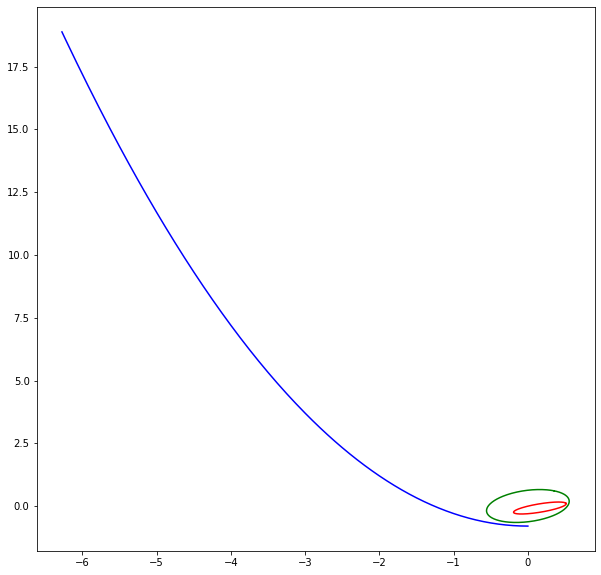

In [53]:
fig1x, fig1y = ellipse(t, a1, b1, x01, y01)
fig1x, fig1y = rotate(fig1x, fig1y, alpha1)

fig2x, fig2y = ellipse(t, a2, b2, x02, y02)
fig2x, fig2y = rotate(fig2x, fig2y, alpha2)

fig3x, fig3y = parabola(t, p, x03, y03)

fig3x, fig3y = rotate(fig3x, fig3y, alpha3)

figure = plt.figure(figsize = (10, 10))

plt.plot(fig1x, fig1y, c = 'r')
plt.plot(fig2x, fig2y, c = 'g')
plt.plot(fig3x, fig3y, c = 'b')
plt.show()

In [54]:
datax = np.concatenate((fig1x, fig2x, fig3x), axis=0)
datay = np.concatenate((fig1y, fig2y, fig3y), axis=0)


data = np.array([datax, datay])

l1 = [[1, 0, 0] for _ in range(len(fig1x))]
l2 = [[0, 1, 0] for _ in range(len(fig2x))]
l3 = [[0, 0, 1] for _ in range(len(fig3x))]

labels = np.array(l1 + l2 + l3)

data = data.transpose()

train, test, train_labels, test_labels = train_test_split(data, labels, test_size = 0.2, random_state = 10, shuffle = True)

In [55]:
model = keras.models.Sequential()

model.add(Dense(25, input_dim = 2, activation = "tanh",  kernel_initializer = keras.initializers.RandomNormal(stddev = 0.01), bias_initializer = keras.initializers.Zeros()))
model.add(Dense(57, activation = "tanh"))
model.add(Dense(3, activation = "sigmoid"))

model.compile(tf.keras.optimizers.SGD(0.05), 'mse')

hist = model.fit(train, train_labels, batch_size = 1, epochs = 200)


Epoch 1/200
604/604 [==============================] - 1s 2ms/step - loss: 0.1555
Epoch 2/200
604/604 [==============================] - 1s 1ms/step - loss: 0.1347
Epoch 3/200
604/604 [==============================] - 1s 1ms/step - loss: 0.1310
Epoch 4/200
604/604 [==============================] - 1s 1ms/step - loss: 0.1296
Epoch 5/200
604/604 [==============================] - 1s 1ms/step - loss: 0.1280
Epoch 6/200
604/604 [==============================] - 1s 2ms/step - loss: 0.1284
Epoch 7/200
604/604 [==============================] - 1s 1ms/step - loss: 0.1275
Epoch 8/200
604/604 [==============================] - 1s 1ms/step - loss: 0.1261
Epoch 9/200
604/604 [==============================] - 1s 1ms/step - loss: 0.1250
Epoch 10/200
604/604 [==============================] - 1s 1ms/step - loss: 0.1262
Epoch 11/200
604/604 [==============================] - 1s 1ms/step - loss: 0.1244
Epoch 12/200
604/604 [==============================] - 1s 2ms/step - loss: 0.1233
Epoch 13/200


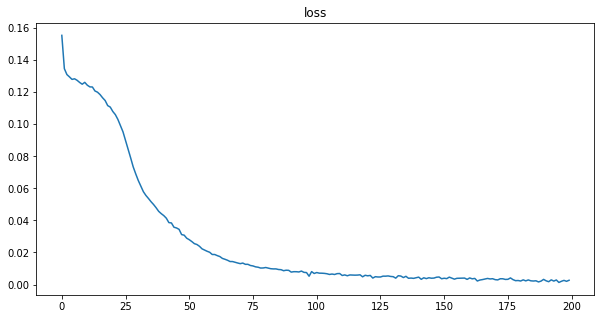

In [56]:
figure = plt.figure(figsize = (10, 5))
histx = []
for i in range(len(hist.history['loss'])):
    histx.append(i)


plt.plot(histx, hist.history['loss'])
plt.title("loss")
plt.show()

1250/1250 [==============================] - 2s 1ms/step


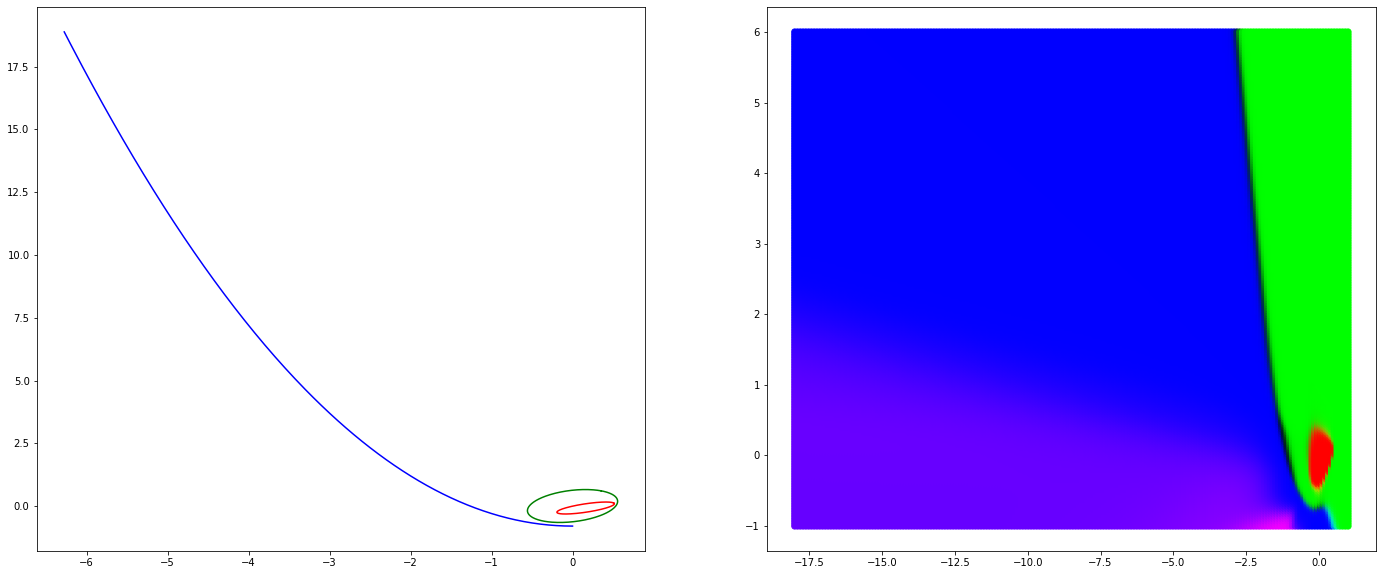

In [57]:
x = np.linspace(-18, 1, 200)
y = np.linspace(-1, 6, 200)

figure = plt.figure(figsize = (24, 10))

ax1 = figure.add_subplot(1, 2, 1)
ax2 = figure.add_subplot(1, 2, 2)

ax1.plot(fig1x, fig1y, c = 'r')
ax1.plot(fig2x, fig2y, c = 'g')
ax1.plot(fig3x, fig3y, c = 'b')

data = np.array(list(itertools.product(x, y)))

xy = data.transpose()

pred = model.predict(data)


ax2.scatter(xy[0], xy[1], c = pred)

plt.show()

## Аппроксимация

In [58]:
f = lambda t: np.cos(-5*t**2 + 10*t - 5)
t = np.arange(0, 2.5, 0.01)
ft = f(t)

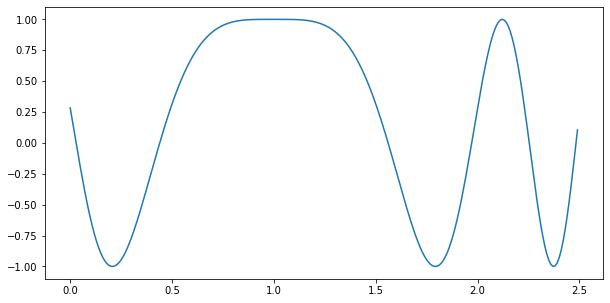

In [59]:
figure = plt.figure(figsize = (10, 5))

plt.plot(t, ft)
plt.show()

In [60]:
model = keras.models.Sequential()

model.add(Dense(20, input_dim = 1, activation = "tanh",  kernel_initializer = keras.initializers.RandomNormal(stddev = 0.01), bias_initializer = keras.initializers.Zeros()))
model.add(Dense(100, activation = "tanh"))
model.add(Dense(40, activation = "tanh"))
model.add(Dense(1, activation = "linear"))

model.compile(tf.keras.optimizers.SGD(0.01), 'mse')

hist = model.fit(t, ft, batch_size = 1, epochs = 600, shuffle = True)

Epoch 1/600
250/250 [==============================] - 1s 2ms/step - loss: 0.5861
Epoch 2/600
250/250 [==============================] - 0s 2ms/step - loss: 0.5759
Epoch 3/600
250/250 [==============================] - 0s 1ms/step - loss: 0.5712
Epoch 4/600
250/250 [==============================] - 0s 1ms/step - loss: 0.5730
Epoch 5/600
250/250 [==============================] - 0s 2ms/step - loss: 0.5686
Epoch 6/600
250/250 [==============================] - 0s 1ms/step - loss: 0.5577
Epoch 7/600
250/250 [==============================] - 0s 1ms/step - loss: 0.5578
Epoch 8/600
250/250 [==============================] - 0s 2ms/step - loss: 0.5606
Epoch 9/600
250/250 [==============================] - 0s 2ms/step - loss: 0.5588
Epoch 10/600
250/250 [==============================] - 0s 1ms/step - loss: 0.5637
Epoch 11/600
250/250 [==============================] - 0s 2ms/step - loss: 0.5569
Epoch 12/600
250/250 [==============================] - 0s 2ms/step - loss: 0.5426
Epoch 13/600


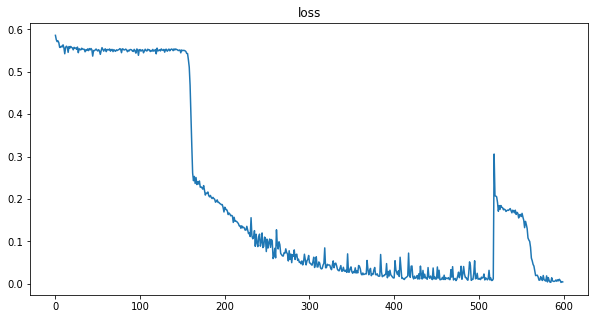

In [61]:
figure = plt.figure(figsize = (10, 5))
histx = []
for i in range(len(hist.history['loss'])):
    histx.append(i)


plt.plot(histx, hist.history['loss'])
plt.title("loss")
plt.show()

8/8 [==============================] - 0s 3ms/step


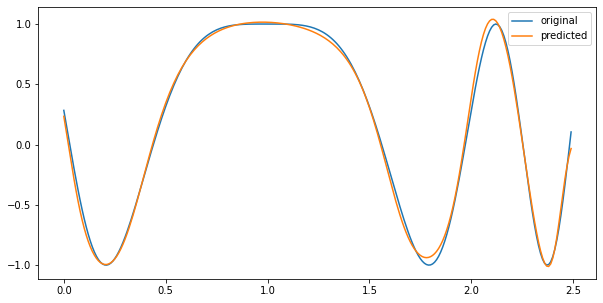

In [62]:
t2 = np.arange(0, 2.5, 0.01)

pred = model.predict(t2)

figure = plt.figure(figsize = (10, 5))

plt.plot(t, ft, label = 'original')
plt.plot(t2, pred, label = 'predicted')
plt.legend()
plt.show()


## Выводы
Ознакомился с многослойными нейронными сетями и их свойствами. Реализовал две многослойные модели для решения задач классификации и апроскимации.